In [645]:
%matplotlib inline
import os

import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

import numpy as np
import math

# Input Parameters

In [516]:
MODEL_DIR = 'C:\\Users\\Anton Domini\\Desktop\\HACK4IT\\H4Rice2019\\geno_pheno_train.csv'
response = 'GRWT100'


test_size = 0.2
random_state = 83

# Load Data

In [481]:
data_df = pd.read_csv(MODEL_DIR)

In [482]:
# Dropping values with NA in group column
data_df.dropna(subset=['group'], inplace=True)

In [ ]:
data_df.nunique()

# Preprocessing

In [483]:
proc_df = pd.DataFrame()

In [484]:
train_col = [col for col in data_df.columns.values if col not in ['ID', 'group', 'GRWT100', 'GRWD', 'GRLT', 'LWD', 'Seedling_height']]

In [485]:
new_train_col = []

for col in train_col:
    new_train_col.append(col+'_NA')
    new_train_col.append(col+'_0')
    new_train_col.append(col+'_1')
    new_train_col.append(col+'_2') 

In [486]:
# Changing the imputed values back to ANN
def cleanificator(x):
    diff = x - int(x)
    th = 0.0000000000000000001
    if diff < th:
        return '{}_{}'.format(col, str(int(x)))
    else:
        return '{}_{}'.format(col, 'NA')
    
def clean_cols(data_df, train_cols):
    proc_df = pd.DataFrame()
    global col
    for col in train_cols:
        proc_df[col] = data_df[col].apply(cleanificator)
    return proc_df

In [487]:
# dummyfiying the columns
def dummify_cols(df, cols, drop=True):
    len_cols = len(cols)
    counter = 0
    dummy_df = pd.DataFrame()
    
    for col in cols:   
        temp_df = pd.get_dummies(df[col])
        dummy_df = pd.concat([dummy_df, temp_df], axis=1)
        
        counter = counter+1
        print 'Dummify progress: {}/{}'.format(counter, len_cols)
    return dummy_df

In [488]:
# fixing the columns not filled up
def fix_cols_entry(df, new_train_col):
    counter = 0
    len_cols = len(new_train_col)
    new_cols = df.columns.values
    temp_df = df.copy()
    
    for col in new_train_col:
        if col not in new_cols:
            temp_df[col] = 0   
            
        counter = counter+1
        print 'Fixed column progress: {}/{}'.format(counter, len_cols)        
    return temp_df

In [489]:
proc_df = clean_cols(data_df, train_col)

In [491]:
dum_df = dummify_cols(proc_df, train_col)

Dummify progress: 1/11460
Dummify progress: 2/11460
Dummify progress: 3/11460
Dummify progress: 4/11460
Dummify progress: 5/11460
Dummify progress: 6/11460
Dummify progress: 7/11460
Dummify progress: 8/11460
Dummify progress: 9/11460
Dummify progress: 10/11460
Dummify progress: 11/11460
Dummify progress: 12/11460
Dummify progress: 13/11460
Dummify progress: 14/11460
Dummify progress: 15/11460
Dummify progress: 16/11460
Dummify progress: 17/11460
Dummify progress: 18/11460
Dummify progress: 19/11460
Dummify progress: 20/11460
Dummify progress: 21/11460
Dummify progress: 22/11460
Dummify progress: 23/11460
Dummify progress: 24/11460
Dummify progress: 25/11460
Dummify progress: 26/11460
Dummify progress: 27/11460
Dummify progress: 28/11460
Dummify progress: 29/11460
Dummify progress: 30/11460
Dummify progress: 31/11460
Dummify progress: 32/11460
Dummify progress: 33/11460
Dummify progress: 34/11460
Dummify progress: 35/11460
Dummify progress: 36/11460
Dummify progress: 37/11460
Dummify pr

Dummify progress: 328/11460
Dummify progress: 329/11460
Dummify progress: 330/11460
Dummify progress: 331/11460
Dummify progress: 332/11460
Dummify progress: 333/11460
Dummify progress: 334/11460
Dummify progress: 335/11460
Dummify progress: 336/11460
Dummify progress: 337/11460
Dummify progress: 338/11460
Dummify progress: 339/11460
Dummify progress: 340/11460
Dummify progress: 341/11460
Dummify progress: 342/11460
Dummify progress: 343/11460
Dummify progress: 344/11460
Dummify progress: 345/11460
Dummify progress: 346/11460
Dummify progress: 347/11460
Dummify progress: 348/11460
Dummify progress: 349/11460
Dummify progress: 350/11460
Dummify progress: 351/11460
Dummify progress: 352/11460
Dummify progress: 353/11460
Dummify progress: 354/11460
Dummify progress: 355/11460
Dummify progress: 356/11460
Dummify progress: 357/11460
Dummify progress: 358/11460
Dummify progress: 359/11460
Dummify progress: 360/11460
Dummify progress: 361/11460
Dummify progress: 362/11460
Dummify progress: 36

Dummify progress: 637/11460
Dummify progress: 638/11460
Dummify progress: 639/11460
Dummify progress: 640/11460
Dummify progress: 641/11460
Dummify progress: 642/11460
Dummify progress: 643/11460
Dummify progress: 644/11460
Dummify progress: 645/11460
Dummify progress: 646/11460
Dummify progress: 647/11460
Dummify progress: 648/11460
Dummify progress: 649/11460
Dummify progress: 650/11460
Dummify progress: 651/11460
Dummify progress: 652/11460
Dummify progress: 653/11460
Dummify progress: 654/11460
Dummify progress: 655/11460
Dummify progress: 656/11460
Dummify progress: 657/11460
Dummify progress: 658/11460
Dummify progress: 659/11460
Dummify progress: 660/11460
Dummify progress: 661/11460
Dummify progress: 662/11460
Dummify progress: 663/11460
Dummify progress: 664/11460
Dummify progress: 665/11460
Dummify progress: 666/11460
Dummify progress: 667/11460
Dummify progress: 668/11460
Dummify progress: 669/11460
Dummify progress: 670/11460
Dummify progress: 671/11460
Dummify progress: 67

Dummify progress: 934/11460
Dummify progress: 935/11460
Dummify progress: 936/11460
Dummify progress: 937/11460
Dummify progress: 938/11460
Dummify progress: 939/11460
Dummify progress: 940/11460
Dummify progress: 941/11460
Dummify progress: 942/11460
Dummify progress: 943/11460
Dummify progress: 944/11460
Dummify progress: 945/11460
Dummify progress: 946/11460
Dummify progress: 947/11460
Dummify progress: 948/11460
Dummify progress: 949/11460
Dummify progress: 950/11460
Dummify progress: 951/11460
Dummify progress: 952/11460
Dummify progress: 953/11460
Dummify progress: 954/11460
Dummify progress: 955/11460
Dummify progress: 956/11460
Dummify progress: 957/11460
Dummify progress: 958/11460
Dummify progress: 959/11460
Dummify progress: 960/11460
Dummify progress: 961/11460
Dummify progress: 962/11460
Dummify progress: 963/11460
Dummify progress: 964/11460
Dummify progress: 965/11460
Dummify progress: 966/11460
Dummify progress: 967/11460
Dummify progress: 968/11460
Dummify progress: 96

Dummify progress: 1228/11460
Dummify progress: 1229/11460
Dummify progress: 1230/11460
Dummify progress: 1231/11460
Dummify progress: 1232/11460
Dummify progress: 1233/11460
Dummify progress: 1234/11460
Dummify progress: 1235/11460
Dummify progress: 1236/11460
Dummify progress: 1237/11460
Dummify progress: 1238/11460
Dummify progress: 1239/11460
Dummify progress: 1240/11460
Dummify progress: 1241/11460
Dummify progress: 1242/11460
Dummify progress: 1243/11460
Dummify progress: 1244/11460
Dummify progress: 1245/11460
Dummify progress: 1246/11460
Dummify progress: 1247/11460
Dummify progress: 1248/11460
Dummify progress: 1249/11460
Dummify progress: 1250/11460
Dummify progress: 1251/11460
Dummify progress: 1252/11460
Dummify progress: 1253/11460
Dummify progress: 1254/11460
Dummify progress: 1255/11460
Dummify progress: 1256/11460
Dummify progress: 1257/11460
Dummify progress: 1258/11460
Dummify progress: 1259/11460
Dummify progress: 1260/11460
Dummify progress: 1261/11460
Dummify progre

Dummify progress: 1512/11460
Dummify progress: 1513/11460
Dummify progress: 1514/11460
Dummify progress: 1515/11460
Dummify progress: 1516/11460
Dummify progress: 1517/11460
Dummify progress: 1518/11460
Dummify progress: 1519/11460
Dummify progress: 1520/11460
Dummify progress: 1521/11460
Dummify progress: 1522/11460
Dummify progress: 1523/11460
Dummify progress: 1524/11460
Dummify progress: 1525/11460
Dummify progress: 1526/11460
Dummify progress: 1527/11460
Dummify progress: 1528/11460
Dummify progress: 1529/11460
Dummify progress: 1530/11460
Dummify progress: 1531/11460
Dummify progress: 1532/11460
Dummify progress: 1533/11460
Dummify progress: 1534/11460
Dummify progress: 1535/11460
Dummify progress: 1536/11460
Dummify progress: 1537/11460
Dummify progress: 1538/11460
Dummify progress: 1539/11460
Dummify progress: 1540/11460
Dummify progress: 1541/11460
Dummify progress: 1542/11460
Dummify progress: 1543/11460
Dummify progress: 1544/11460
Dummify progress: 1545/11460
Dummify progre

Dummify progress: 1799/11460
Dummify progress: 1800/11460
Dummify progress: 1801/11460
Dummify progress: 1802/11460
Dummify progress: 1803/11460
Dummify progress: 1804/11460
Dummify progress: 1805/11460
Dummify progress: 1806/11460
Dummify progress: 1807/11460
Dummify progress: 1808/11460
Dummify progress: 1809/11460
Dummify progress: 1810/11460
Dummify progress: 1811/11460
Dummify progress: 1812/11460
Dummify progress: 1813/11460
Dummify progress: 1814/11460
Dummify progress: 1815/11460
Dummify progress: 1816/11460
Dummify progress: 1817/11460
Dummify progress: 1818/11460
Dummify progress: 1819/11460
Dummify progress: 1820/11460
Dummify progress: 1821/11460
Dummify progress: 1822/11460
Dummify progress: 1823/11460
Dummify progress: 1824/11460
Dummify progress: 1825/11460
Dummify progress: 1826/11460
Dummify progress: 1827/11460
Dummify progress: 1828/11460
Dummify progress: 1829/11460
Dummify progress: 1830/11460
Dummify progress: 1831/11460
Dummify progress: 1832/11460
Dummify progre

Dummify progress: 2082/11460
Dummify progress: 2083/11460
Dummify progress: 2084/11460
Dummify progress: 2085/11460
Dummify progress: 2086/11460
Dummify progress: 2087/11460
Dummify progress: 2088/11460
Dummify progress: 2089/11460
Dummify progress: 2090/11460
Dummify progress: 2091/11460
Dummify progress: 2092/11460
Dummify progress: 2093/11460
Dummify progress: 2094/11460
Dummify progress: 2095/11460
Dummify progress: 2096/11460
Dummify progress: 2097/11460
Dummify progress: 2098/11460
Dummify progress: 2099/11460
Dummify progress: 2100/11460
Dummify progress: 2101/11460
Dummify progress: 2102/11460
Dummify progress: 2103/11460
Dummify progress: 2104/11460
Dummify progress: 2105/11460
Dummify progress: 2106/11460
Dummify progress: 2107/11460
Dummify progress: 2108/11460
Dummify progress: 2109/11460
Dummify progress: 2110/11460
Dummify progress: 2111/11460
Dummify progress: 2112/11460
Dummify progress: 2113/11460
Dummify progress: 2114/11460
Dummify progress: 2115/11460
Dummify progre

Dummify progress: 2367/11460
Dummify progress: 2368/11460
Dummify progress: 2369/11460
Dummify progress: 2370/11460
Dummify progress: 2371/11460
Dummify progress: 2372/11460
Dummify progress: 2373/11460
Dummify progress: 2374/11460
Dummify progress: 2375/11460
Dummify progress: 2376/11460
Dummify progress: 2377/11460
Dummify progress: 2378/11460
Dummify progress: 2379/11460
Dummify progress: 2380/11460
Dummify progress: 2381/11460
Dummify progress: 2382/11460
Dummify progress: 2383/11460
Dummify progress: 2384/11460
Dummify progress: 2385/11460
Dummify progress: 2386/11460
Dummify progress: 2387/11460
Dummify progress: 2388/11460
Dummify progress: 2389/11460
Dummify progress: 2390/11460
Dummify progress: 2391/11460
Dummify progress: 2392/11460
Dummify progress: 2393/11460
Dummify progress: 2394/11460
Dummify progress: 2395/11460
Dummify progress: 2396/11460
Dummify progress: 2397/11460
Dummify progress: 2398/11460
Dummify progress: 2399/11460
Dummify progress: 2400/11460
Dummify progre

Dummify progress: 2652/11460
Dummify progress: 2653/11460
Dummify progress: 2654/11460
Dummify progress: 2655/11460
Dummify progress: 2656/11460
Dummify progress: 2657/11460
Dummify progress: 2658/11460
Dummify progress: 2659/11460
Dummify progress: 2660/11460
Dummify progress: 2661/11460
Dummify progress: 2662/11460
Dummify progress: 2663/11460
Dummify progress: 2664/11460
Dummify progress: 2665/11460
Dummify progress: 2666/11460
Dummify progress: 2667/11460
Dummify progress: 2668/11460
Dummify progress: 2669/11460
Dummify progress: 2670/11460
Dummify progress: 2671/11460
Dummify progress: 2672/11460
Dummify progress: 2673/11460
Dummify progress: 2674/11460
Dummify progress: 2675/11460
Dummify progress: 2676/11460
Dummify progress: 2677/11460
Dummify progress: 2678/11460
Dummify progress: 2679/11460
Dummify progress: 2680/11460
Dummify progress: 2681/11460
Dummify progress: 2682/11460
Dummify progress: 2683/11460
Dummify progress: 2684/11460
Dummify progress: 2685/11460
Dummify progre

Dummify progress: 2935/11460
Dummify progress: 2936/11460
Dummify progress: 2937/11460
Dummify progress: 2938/11460
Dummify progress: 2939/11460
Dummify progress: 2940/11460
Dummify progress: 2941/11460
Dummify progress: 2942/11460
Dummify progress: 2943/11460
Dummify progress: 2944/11460
Dummify progress: 2945/11460
Dummify progress: 2946/11460
Dummify progress: 2947/11460
Dummify progress: 2948/11460
Dummify progress: 2949/11460
Dummify progress: 2950/11460
Dummify progress: 2951/11460
Dummify progress: 2952/11460
Dummify progress: 2953/11460
Dummify progress: 2954/11460
Dummify progress: 2955/11460
Dummify progress: 2956/11460
Dummify progress: 2957/11460
Dummify progress: 2958/11460
Dummify progress: 2959/11460
Dummify progress: 2960/11460
Dummify progress: 2961/11460
Dummify progress: 2962/11460
Dummify progress: 2963/11460
Dummify progress: 2964/11460
Dummify progress: 2965/11460
Dummify progress: 2966/11460
Dummify progress: 2967/11460
Dummify progress: 2968/11460
Dummify progre

Dummify progress: 3221/11460
Dummify progress: 3222/11460
Dummify progress: 3223/11460
Dummify progress: 3224/11460
Dummify progress: 3225/11460
Dummify progress: 3226/11460
Dummify progress: 3227/11460
Dummify progress: 3228/11460
Dummify progress: 3229/11460
Dummify progress: 3230/11460
Dummify progress: 3231/11460
Dummify progress: 3232/11460
Dummify progress: 3233/11460
Dummify progress: 3234/11460
Dummify progress: 3235/11460
Dummify progress: 3236/11460
Dummify progress: 3237/11460
Dummify progress: 3238/11460
Dummify progress: 3239/11460
Dummify progress: 3240/11460
Dummify progress: 3241/11460
Dummify progress: 3242/11460
Dummify progress: 3243/11460
Dummify progress: 3244/11460
Dummify progress: 3245/11460
Dummify progress: 3246/11460
Dummify progress: 3247/11460
Dummify progress: 3248/11460
Dummify progress: 3249/11460
Dummify progress: 3250/11460
Dummify progress: 3251/11460
Dummify progress: 3252/11460
Dummify progress: 3253/11460
Dummify progress: 3254/11460
Dummify progre

Dummify progress: 3504/11460
Dummify progress: 3505/11460
Dummify progress: 3506/11460
Dummify progress: 3507/11460
Dummify progress: 3508/11460
Dummify progress: 3509/11460
Dummify progress: 3510/11460
Dummify progress: 3511/11460
Dummify progress: 3512/11460
Dummify progress: 3513/11460
Dummify progress: 3514/11460
Dummify progress: 3515/11460
Dummify progress: 3516/11460
Dummify progress: 3517/11460
Dummify progress: 3518/11460
Dummify progress: 3519/11460
Dummify progress: 3520/11460
Dummify progress: 3521/11460
Dummify progress: 3522/11460
Dummify progress: 3523/11460
Dummify progress: 3524/11460
Dummify progress: 3525/11460
Dummify progress: 3526/11460
Dummify progress: 3527/11460
Dummify progress: 3528/11460
Dummify progress: 3529/11460
Dummify progress: 3530/11460
Dummify progress: 3531/11460
Dummify progress: 3532/11460
Dummify progress: 3533/11460
Dummify progress: 3534/11460
Dummify progress: 3535/11460
Dummify progress: 3536/11460
Dummify progress: 3537/11460
Dummify progre

Dummify progress: 3786/11460
Dummify progress: 3787/11460
Dummify progress: 3788/11460
Dummify progress: 3789/11460
Dummify progress: 3790/11460
Dummify progress: 3791/11460
Dummify progress: 3792/11460
Dummify progress: 3793/11460
Dummify progress: 3794/11460
Dummify progress: 3795/11460
Dummify progress: 3796/11460
Dummify progress: 3797/11460
Dummify progress: 3798/11460
Dummify progress: 3799/11460
Dummify progress: 3800/11460
Dummify progress: 3801/11460
Dummify progress: 3802/11460
Dummify progress: 3803/11460
Dummify progress: 3804/11460
Dummify progress: 3805/11460
Dummify progress: 3806/11460
Dummify progress: 3807/11460
Dummify progress: 3808/11460
Dummify progress: 3809/11460
Dummify progress: 3810/11460
Dummify progress: 3811/11460
Dummify progress: 3812/11460
Dummify progress: 3813/11460
Dummify progress: 3814/11460
Dummify progress: 3815/11460
Dummify progress: 3816/11460
Dummify progress: 3817/11460
Dummify progress: 3818/11460
Dummify progress: 3819/11460
Dummify progre

Dummify progress: 4072/11460
Dummify progress: 4073/11460
Dummify progress: 4074/11460
Dummify progress: 4075/11460
Dummify progress: 4076/11460
Dummify progress: 4077/11460
Dummify progress: 4078/11460
Dummify progress: 4079/11460
Dummify progress: 4080/11460
Dummify progress: 4081/11460
Dummify progress: 4082/11460
Dummify progress: 4083/11460
Dummify progress: 4084/11460
Dummify progress: 4085/11460
Dummify progress: 4086/11460
Dummify progress: 4087/11460
Dummify progress: 4088/11460
Dummify progress: 4089/11460
Dummify progress: 4090/11460
Dummify progress: 4091/11460
Dummify progress: 4092/11460
Dummify progress: 4093/11460
Dummify progress: 4094/11460
Dummify progress: 4095/11460
Dummify progress: 4096/11460
Dummify progress: 4097/11460
Dummify progress: 4098/11460
Dummify progress: 4099/11460
Dummify progress: 4100/11460
Dummify progress: 4101/11460
Dummify progress: 4102/11460
Dummify progress: 4103/11460
Dummify progress: 4104/11460
Dummify progress: 4105/11460
Dummify progre

Dummify progress: 4358/11460
Dummify progress: 4359/11460
Dummify progress: 4360/11460
Dummify progress: 4361/11460
Dummify progress: 4362/11460
Dummify progress: 4363/11460
Dummify progress: 4364/11460
Dummify progress: 4365/11460
Dummify progress: 4366/11460
Dummify progress: 4367/11460
Dummify progress: 4368/11460
Dummify progress: 4369/11460
Dummify progress: 4370/11460
Dummify progress: 4371/11460
Dummify progress: 4372/11460
Dummify progress: 4373/11460
Dummify progress: 4374/11460
Dummify progress: 4375/11460
Dummify progress: 4376/11460
Dummify progress: 4377/11460
Dummify progress: 4378/11460
Dummify progress: 4379/11460
Dummify progress: 4380/11460
Dummify progress: 4381/11460
Dummify progress: 4382/11460
Dummify progress: 4383/11460
Dummify progress: 4384/11460
Dummify progress: 4385/11460
Dummify progress: 4386/11460
Dummify progress: 4387/11460
Dummify progress: 4388/11460
Dummify progress: 4389/11460
Dummify progress: 4390/11460
Dummify progress: 4391/11460
Dummify progre

Dummify progress: 4644/11460
Dummify progress: 4645/11460
Dummify progress: 4646/11460
Dummify progress: 4647/11460
Dummify progress: 4648/11460
Dummify progress: 4649/11460
Dummify progress: 4650/11460
Dummify progress: 4651/11460
Dummify progress: 4652/11460
Dummify progress: 4653/11460
Dummify progress: 4654/11460
Dummify progress: 4655/11460
Dummify progress: 4656/11460
Dummify progress: 4657/11460
Dummify progress: 4658/11460
Dummify progress: 4659/11460
Dummify progress: 4660/11460
Dummify progress: 4661/11460
Dummify progress: 4662/11460
Dummify progress: 4663/11460
Dummify progress: 4664/11460
Dummify progress: 4665/11460
Dummify progress: 4666/11460
Dummify progress: 4667/11460
Dummify progress: 4668/11460
Dummify progress: 4669/11460
Dummify progress: 4670/11460
Dummify progress: 4671/11460
Dummify progress: 4672/11460
Dummify progress: 4673/11460
Dummify progress: 4674/11460
Dummify progress: 4675/11460
Dummify progress: 4676/11460
Dummify progress: 4677/11460
Dummify progre

Dummify progress: 4928/11460
Dummify progress: 4929/11460
Dummify progress: 4930/11460
Dummify progress: 4931/11460
Dummify progress: 4932/11460
Dummify progress: 4933/11460
Dummify progress: 4934/11460
Dummify progress: 4935/11460
Dummify progress: 4936/11460
Dummify progress: 4937/11460
Dummify progress: 4938/11460
Dummify progress: 4939/11460
Dummify progress: 4940/11460
Dummify progress: 4941/11460
Dummify progress: 4942/11460
Dummify progress: 4943/11460
Dummify progress: 4944/11460
Dummify progress: 4945/11460
Dummify progress: 4946/11460
Dummify progress: 4947/11460
Dummify progress: 4948/11460
Dummify progress: 4949/11460
Dummify progress: 4950/11460
Dummify progress: 4951/11460
Dummify progress: 4952/11460
Dummify progress: 4953/11460
Dummify progress: 4954/11460
Dummify progress: 4955/11460
Dummify progress: 4956/11460
Dummify progress: 4957/11460
Dummify progress: 4958/11460
Dummify progress: 4959/11460
Dummify progress: 4960/11460
Dummify progress: 4961/11460
Dummify progre

Dummify progress: 5211/11460
Dummify progress: 5212/11460
Dummify progress: 5213/11460
Dummify progress: 5214/11460
Dummify progress: 5215/11460
Dummify progress: 5216/11460
Dummify progress: 5217/11460
Dummify progress: 5218/11460
Dummify progress: 5219/11460
Dummify progress: 5220/11460
Dummify progress: 5221/11460
Dummify progress: 5222/11460
Dummify progress: 5223/11460
Dummify progress: 5224/11460
Dummify progress: 5225/11460
Dummify progress: 5226/11460
Dummify progress: 5227/11460
Dummify progress: 5228/11460
Dummify progress: 5229/11460
Dummify progress: 5230/11460
Dummify progress: 5231/11460
Dummify progress: 5232/11460
Dummify progress: 5233/11460
Dummify progress: 5234/11460
Dummify progress: 5235/11460
Dummify progress: 5236/11460
Dummify progress: 5237/11460
Dummify progress: 5238/11460
Dummify progress: 5239/11460
Dummify progress: 5240/11460
Dummify progress: 5241/11460
Dummify progress: 5242/11460
Dummify progress: 5243/11460
Dummify progress: 5244/11460
Dummify progre

Dummify progress: 5495/11460
Dummify progress: 5496/11460
Dummify progress: 5497/11460
Dummify progress: 5498/11460
Dummify progress: 5499/11460
Dummify progress: 5500/11460
Dummify progress: 5501/11460
Dummify progress: 5502/11460
Dummify progress: 5503/11460
Dummify progress: 5504/11460
Dummify progress: 5505/11460
Dummify progress: 5506/11460
Dummify progress: 5507/11460
Dummify progress: 5508/11460
Dummify progress: 5509/11460
Dummify progress: 5510/11460
Dummify progress: 5511/11460
Dummify progress: 5512/11460
Dummify progress: 5513/11460
Dummify progress: 5514/11460
Dummify progress: 5515/11460
Dummify progress: 5516/11460
Dummify progress: 5517/11460
Dummify progress: 5518/11460
Dummify progress: 5519/11460
Dummify progress: 5520/11460
Dummify progress: 5521/11460
Dummify progress: 5522/11460
Dummify progress: 5523/11460
Dummify progress: 5524/11460
Dummify progress: 5525/11460
Dummify progress: 5526/11460
Dummify progress: 5527/11460
Dummify progress: 5528/11460
Dummify progre

Dummify progress: 5780/11460
Dummify progress: 5781/11460
Dummify progress: 5782/11460
Dummify progress: 5783/11460
Dummify progress: 5784/11460
Dummify progress: 5785/11460
Dummify progress: 5786/11460
Dummify progress: 5787/11460
Dummify progress: 5788/11460
Dummify progress: 5789/11460
Dummify progress: 5790/11460
Dummify progress: 5791/11460
Dummify progress: 5792/11460
Dummify progress: 5793/11460
Dummify progress: 5794/11460
Dummify progress: 5795/11460
Dummify progress: 5796/11460
Dummify progress: 5797/11460
Dummify progress: 5798/11460
Dummify progress: 5799/11460
Dummify progress: 5800/11460
Dummify progress: 5801/11460
Dummify progress: 5802/11460
Dummify progress: 5803/11460
Dummify progress: 5804/11460
Dummify progress: 5805/11460
Dummify progress: 5806/11460
Dummify progress: 5807/11460
Dummify progress: 5808/11460
Dummify progress: 5809/11460
Dummify progress: 5810/11460
Dummify progress: 5811/11460
Dummify progress: 5812/11460
Dummify progress: 5813/11460
Dummify progre

Dummify progress: 6063/11460
Dummify progress: 6064/11460
Dummify progress: 6065/11460
Dummify progress: 6066/11460
Dummify progress: 6067/11460
Dummify progress: 6068/11460
Dummify progress: 6069/11460
Dummify progress: 6070/11460
Dummify progress: 6071/11460
Dummify progress: 6072/11460
Dummify progress: 6073/11460
Dummify progress: 6074/11460
Dummify progress: 6075/11460
Dummify progress: 6076/11460
Dummify progress: 6077/11460
Dummify progress: 6078/11460
Dummify progress: 6079/11460
Dummify progress: 6080/11460
Dummify progress: 6081/11460
Dummify progress: 6082/11460
Dummify progress: 6083/11460
Dummify progress: 6084/11460
Dummify progress: 6085/11460
Dummify progress: 6086/11460
Dummify progress: 6087/11460
Dummify progress: 6088/11460
Dummify progress: 6089/11460
Dummify progress: 6090/11460
Dummify progress: 6091/11460
Dummify progress: 6092/11460
Dummify progress: 6093/11460
Dummify progress: 6094/11460
Dummify progress: 6095/11460
Dummify progress: 6096/11460
Dummify progre

Dummify progress: 6346/11460
Dummify progress: 6347/11460
Dummify progress: 6348/11460
Dummify progress: 6349/11460
Dummify progress: 6350/11460
Dummify progress: 6351/11460
Dummify progress: 6352/11460
Dummify progress: 6353/11460
Dummify progress: 6354/11460
Dummify progress: 6355/11460
Dummify progress: 6356/11460
Dummify progress: 6357/11460
Dummify progress: 6358/11460
Dummify progress: 6359/11460
Dummify progress: 6360/11460
Dummify progress: 6361/11460
Dummify progress: 6362/11460
Dummify progress: 6363/11460
Dummify progress: 6364/11460
Dummify progress: 6365/11460
Dummify progress: 6366/11460
Dummify progress: 6367/11460
Dummify progress: 6368/11460
Dummify progress: 6369/11460
Dummify progress: 6370/11460
Dummify progress: 6371/11460
Dummify progress: 6372/11460
Dummify progress: 6373/11460
Dummify progress: 6374/11460
Dummify progress: 6375/11460
Dummify progress: 6376/11460
Dummify progress: 6377/11460
Dummify progress: 6378/11460
Dummify progress: 6379/11460
Dummify progre

Dummify progress: 6629/11460
Dummify progress: 6630/11460
Dummify progress: 6631/11460
Dummify progress: 6632/11460
Dummify progress: 6633/11460
Dummify progress: 6634/11460
Dummify progress: 6635/11460
Dummify progress: 6636/11460
Dummify progress: 6637/11460
Dummify progress: 6638/11460
Dummify progress: 6639/11460
Dummify progress: 6640/11460
Dummify progress: 6641/11460
Dummify progress: 6642/11460
Dummify progress: 6643/11460
Dummify progress: 6644/11460
Dummify progress: 6645/11460
Dummify progress: 6646/11460
Dummify progress: 6647/11460
Dummify progress: 6648/11460
Dummify progress: 6649/11460
Dummify progress: 6650/11460
Dummify progress: 6651/11460
Dummify progress: 6652/11460
Dummify progress: 6653/11460
Dummify progress: 6654/11460
Dummify progress: 6655/11460
Dummify progress: 6656/11460
Dummify progress: 6657/11460
Dummify progress: 6658/11460
Dummify progress: 6659/11460
Dummify progress: 6660/11460
Dummify progress: 6661/11460
Dummify progress: 6662/11460
Dummify progre

Dummify progress: 6912/11460
Dummify progress: 6913/11460
Dummify progress: 6914/11460
Dummify progress: 6915/11460
Dummify progress: 6916/11460
Dummify progress: 6917/11460
Dummify progress: 6918/11460
Dummify progress: 6919/11460
Dummify progress: 6920/11460
Dummify progress: 6921/11460
Dummify progress: 6922/11460
Dummify progress: 6923/11460
Dummify progress: 6924/11460
Dummify progress: 6925/11460
Dummify progress: 6926/11460
Dummify progress: 6927/11460
Dummify progress: 6928/11460
Dummify progress: 6929/11460
Dummify progress: 6930/11460
Dummify progress: 6931/11460
Dummify progress: 6932/11460
Dummify progress: 6933/11460
Dummify progress: 6934/11460
Dummify progress: 6935/11460
Dummify progress: 6936/11460
Dummify progress: 6937/11460
Dummify progress: 6938/11460
Dummify progress: 6939/11460
Dummify progress: 6940/11460
Dummify progress: 6941/11460
Dummify progress: 6942/11460
Dummify progress: 6943/11460
Dummify progress: 6944/11460
Dummify progress: 6945/11460
Dummify progre

Dummify progress: 7196/11460
Dummify progress: 7197/11460
Dummify progress: 7198/11460
Dummify progress: 7199/11460
Dummify progress: 7200/11460
Dummify progress: 7201/11460
Dummify progress: 7202/11460
Dummify progress: 7203/11460
Dummify progress: 7204/11460
Dummify progress: 7205/11460
Dummify progress: 7206/11460
Dummify progress: 7207/11460
Dummify progress: 7208/11460
Dummify progress: 7209/11460
Dummify progress: 7210/11460
Dummify progress: 7211/11460
Dummify progress: 7212/11460
Dummify progress: 7213/11460
Dummify progress: 7214/11460
Dummify progress: 7215/11460
Dummify progress: 7216/11460
Dummify progress: 7217/11460
Dummify progress: 7218/11460
Dummify progress: 7219/11460
Dummify progress: 7220/11460
Dummify progress: 7221/11460
Dummify progress: 7222/11460
Dummify progress: 7223/11460
Dummify progress: 7224/11460
Dummify progress: 7225/11460
Dummify progress: 7226/11460
Dummify progress: 7227/11460
Dummify progress: 7228/11460
Dummify progress: 7229/11460
Dummify progre

Dummify progress: 7479/11460
Dummify progress: 7480/11460
Dummify progress: 7481/11460
Dummify progress: 7482/11460
Dummify progress: 7483/11460
Dummify progress: 7484/11460
Dummify progress: 7485/11460
Dummify progress: 7486/11460
Dummify progress: 7487/11460
Dummify progress: 7488/11460
Dummify progress: 7489/11460
Dummify progress: 7490/11460
Dummify progress: 7491/11460
Dummify progress: 7492/11460
Dummify progress: 7493/11460
Dummify progress: 7494/11460
Dummify progress: 7495/11460
Dummify progress: 7496/11460
Dummify progress: 7497/11460
Dummify progress: 7498/11460
Dummify progress: 7499/11460
Dummify progress: 7500/11460
Dummify progress: 7501/11460
Dummify progress: 7502/11460
Dummify progress: 7503/11460
Dummify progress: 7504/11460
Dummify progress: 7505/11460
Dummify progress: 7506/11460
Dummify progress: 7507/11460
Dummify progress: 7508/11460
Dummify progress: 7509/11460
Dummify progress: 7510/11460
Dummify progress: 7511/11460
Dummify progress: 7512/11460
Dummify progre

Dummify progress: 7762/11460
Dummify progress: 7763/11460
Dummify progress: 7764/11460
Dummify progress: 7765/11460
Dummify progress: 7766/11460
Dummify progress: 7767/11460
Dummify progress: 7768/11460
Dummify progress: 7769/11460
Dummify progress: 7770/11460
Dummify progress: 7771/11460
Dummify progress: 7772/11460
Dummify progress: 7773/11460
Dummify progress: 7774/11460
Dummify progress: 7775/11460
Dummify progress: 7776/11460
Dummify progress: 7777/11460
Dummify progress: 7778/11460
Dummify progress: 7779/11460
Dummify progress: 7780/11460
Dummify progress: 7781/11460
Dummify progress: 7782/11460
Dummify progress: 7783/11460
Dummify progress: 7784/11460
Dummify progress: 7785/11460
Dummify progress: 7786/11460
Dummify progress: 7787/11460
Dummify progress: 7788/11460
Dummify progress: 7789/11460
Dummify progress: 7790/11460
Dummify progress: 7791/11460
Dummify progress: 7792/11460
Dummify progress: 7793/11460
Dummify progress: 7794/11460
Dummify progress: 7795/11460
Dummify progre

Dummify progress: 8046/11460
Dummify progress: 8047/11460
Dummify progress: 8048/11460
Dummify progress: 8049/11460
Dummify progress: 8050/11460
Dummify progress: 8051/11460
Dummify progress: 8052/11460
Dummify progress: 8053/11460
Dummify progress: 8054/11460
Dummify progress: 8055/11460
Dummify progress: 8056/11460
Dummify progress: 8057/11460
Dummify progress: 8058/11460
Dummify progress: 8059/11460
Dummify progress: 8060/11460
Dummify progress: 8061/11460
Dummify progress: 8062/11460
Dummify progress: 8063/11460
Dummify progress: 8064/11460
Dummify progress: 8065/11460
Dummify progress: 8066/11460
Dummify progress: 8067/11460
Dummify progress: 8068/11460
Dummify progress: 8069/11460
Dummify progress: 8070/11460
Dummify progress: 8071/11460
Dummify progress: 8072/11460
Dummify progress: 8073/11460
Dummify progress: 8074/11460
Dummify progress: 8075/11460
Dummify progress: 8076/11460
Dummify progress: 8077/11460
Dummify progress: 8078/11460
Dummify progress: 8079/11460
Dummify progre

Dummify progress: 8330/11460
Dummify progress: 8331/11460
Dummify progress: 8332/11460
Dummify progress: 8333/11460
Dummify progress: 8334/11460
Dummify progress: 8335/11460
Dummify progress: 8336/11460
Dummify progress: 8337/11460
Dummify progress: 8338/11460
Dummify progress: 8339/11460
Dummify progress: 8340/11460
Dummify progress: 8341/11460
Dummify progress: 8342/11460
Dummify progress: 8343/11460
Dummify progress: 8344/11460
Dummify progress: 8345/11460
Dummify progress: 8346/11460
Dummify progress: 8347/11460
Dummify progress: 8348/11460
Dummify progress: 8349/11460
Dummify progress: 8350/11460
Dummify progress: 8351/11460
Dummify progress: 8352/11460
Dummify progress: 8353/11460
Dummify progress: 8354/11460
Dummify progress: 8355/11460
Dummify progress: 8356/11460
Dummify progress: 8357/11460
Dummify progress: 8358/11460
Dummify progress: 8359/11460
Dummify progress: 8360/11460
Dummify progress: 8361/11460
Dummify progress: 8362/11460
Dummify progress: 8363/11460
Dummify progre

Dummify progress: 8614/11460
Dummify progress: 8615/11460
Dummify progress: 8616/11460
Dummify progress: 8617/11460
Dummify progress: 8618/11460
Dummify progress: 8619/11460
Dummify progress: 8620/11460
Dummify progress: 8621/11460
Dummify progress: 8622/11460
Dummify progress: 8623/11460
Dummify progress: 8624/11460
Dummify progress: 8625/11460
Dummify progress: 8626/11460
Dummify progress: 8627/11460
Dummify progress: 8628/11460
Dummify progress: 8629/11460
Dummify progress: 8630/11460
Dummify progress: 8631/11460
Dummify progress: 8632/11460
Dummify progress: 8633/11460
Dummify progress: 8634/11460
Dummify progress: 8635/11460
Dummify progress: 8636/11460
Dummify progress: 8637/11460
Dummify progress: 8638/11460
Dummify progress: 8639/11460
Dummify progress: 8640/11460
Dummify progress: 8641/11460
Dummify progress: 8642/11460
Dummify progress: 8643/11460
Dummify progress: 8644/11460
Dummify progress: 8645/11460
Dummify progress: 8646/11460
Dummify progress: 8647/11460
Dummify progre

Dummify progress: 8898/11460
Dummify progress: 8899/11460
Dummify progress: 8900/11460
Dummify progress: 8901/11460
Dummify progress: 8902/11460
Dummify progress: 8903/11460
Dummify progress: 8904/11460
Dummify progress: 8905/11460
Dummify progress: 8906/11460
Dummify progress: 8907/11460
Dummify progress: 8908/11460
Dummify progress: 8909/11460
Dummify progress: 8910/11460
Dummify progress: 8911/11460
Dummify progress: 8912/11460
Dummify progress: 8913/11460
Dummify progress: 8914/11460
Dummify progress: 8915/11460
Dummify progress: 8916/11460
Dummify progress: 8917/11460
Dummify progress: 8918/11460
Dummify progress: 8919/11460
Dummify progress: 8920/11460
Dummify progress: 8921/11460
Dummify progress: 8922/11460
Dummify progress: 8923/11460
Dummify progress: 8924/11460
Dummify progress: 8925/11460
Dummify progress: 8926/11460
Dummify progress: 8927/11460
Dummify progress: 8928/11460
Dummify progress: 8929/11460
Dummify progress: 8930/11460
Dummify progress: 8931/11460
Dummify progre

Dummify progress: 9181/11460
Dummify progress: 9182/11460
Dummify progress: 9183/11460
Dummify progress: 9184/11460
Dummify progress: 9185/11460
Dummify progress: 9186/11460
Dummify progress: 9187/11460
Dummify progress: 9188/11460
Dummify progress: 9189/11460
Dummify progress: 9190/11460
Dummify progress: 9191/11460
Dummify progress: 9192/11460
Dummify progress: 9193/11460
Dummify progress: 9194/11460
Dummify progress: 9195/11460
Dummify progress: 9196/11460
Dummify progress: 9197/11460
Dummify progress: 9198/11460
Dummify progress: 9199/11460
Dummify progress: 9200/11460
Dummify progress: 9201/11460
Dummify progress: 9202/11460
Dummify progress: 9203/11460
Dummify progress: 9204/11460
Dummify progress: 9205/11460
Dummify progress: 9206/11460
Dummify progress: 9207/11460
Dummify progress: 9208/11460
Dummify progress: 9209/11460
Dummify progress: 9210/11460
Dummify progress: 9211/11460
Dummify progress: 9212/11460
Dummify progress: 9213/11460
Dummify progress: 9214/11460
Dummify progre

Dummify progress: 9464/11460
Dummify progress: 9465/11460
Dummify progress: 9466/11460
Dummify progress: 9467/11460
Dummify progress: 9468/11460
Dummify progress: 9469/11460
Dummify progress: 9470/11460
Dummify progress: 9471/11460
Dummify progress: 9472/11460
Dummify progress: 9473/11460
Dummify progress: 9474/11460
Dummify progress: 9475/11460
Dummify progress: 9476/11460
Dummify progress: 9477/11460
Dummify progress: 9478/11460
Dummify progress: 9479/11460
Dummify progress: 9480/11460
Dummify progress: 9481/11460
Dummify progress: 9482/11460
Dummify progress: 9483/11460
Dummify progress: 9484/11460
Dummify progress: 9485/11460
Dummify progress: 9486/11460
Dummify progress: 9487/11460
Dummify progress: 9488/11460
Dummify progress: 9489/11460
Dummify progress: 9490/11460
Dummify progress: 9491/11460
Dummify progress: 9492/11460
Dummify progress: 9493/11460
Dummify progress: 9494/11460
Dummify progress: 9495/11460
Dummify progress: 9496/11460
Dummify progress: 9497/11460
Dummify progre

Dummify progress: 9747/11460
Dummify progress: 9748/11460
Dummify progress: 9749/11460
Dummify progress: 9750/11460
Dummify progress: 9751/11460
Dummify progress: 9752/11460
Dummify progress: 9753/11460
Dummify progress: 9754/11460
Dummify progress: 9755/11460
Dummify progress: 9756/11460
Dummify progress: 9757/11460
Dummify progress: 9758/11460
Dummify progress: 9759/11460
Dummify progress: 9760/11460
Dummify progress: 9761/11460
Dummify progress: 9762/11460
Dummify progress: 9763/11460
Dummify progress: 9764/11460
Dummify progress: 9765/11460
Dummify progress: 9766/11460
Dummify progress: 9767/11460
Dummify progress: 9768/11460
Dummify progress: 9769/11460
Dummify progress: 9770/11460
Dummify progress: 9771/11460
Dummify progress: 9772/11460
Dummify progress: 9773/11460
Dummify progress: 9774/11460
Dummify progress: 9775/11460
Dummify progress: 9776/11460
Dummify progress: 9777/11460
Dummify progress: 9778/11460
Dummify progress: 9779/11460
Dummify progress: 9780/11460
Dummify progre

Dummify progress: 10030/11460
Dummify progress: 10031/11460
Dummify progress: 10032/11460
Dummify progress: 10033/11460
Dummify progress: 10034/11460
Dummify progress: 10035/11460
Dummify progress: 10036/11460
Dummify progress: 10037/11460
Dummify progress: 10038/11460
Dummify progress: 10039/11460
Dummify progress: 10040/11460
Dummify progress: 10041/11460
Dummify progress: 10042/11460
Dummify progress: 10043/11460
Dummify progress: 10044/11460
Dummify progress: 10045/11460
Dummify progress: 10046/11460
Dummify progress: 10047/11460
Dummify progress: 10048/11460
Dummify progress: 10049/11460
Dummify progress: 10050/11460
Dummify progress: 10051/11460
Dummify progress: 10052/11460
Dummify progress: 10053/11460
Dummify progress: 10054/11460
Dummify progress: 10055/11460
Dummify progress: 10056/11460
Dummify progress: 10057/11460
Dummify progress: 10058/11460
Dummify progress: 10059/11460
Dummify progress: 10060/11460
Dummify progress: 10061/11460
Dummify progress: 10062/11460
Dummify pr

Dummify progress: 10305/11460
Dummify progress: 10306/11460
Dummify progress: 10307/11460
Dummify progress: 10308/11460
Dummify progress: 10309/11460
Dummify progress: 10310/11460
Dummify progress: 10311/11460
Dummify progress: 10312/11460
Dummify progress: 10313/11460
Dummify progress: 10314/11460
Dummify progress: 10315/11460
Dummify progress: 10316/11460
Dummify progress: 10317/11460
Dummify progress: 10318/11460
Dummify progress: 10319/11460
Dummify progress: 10320/11460
Dummify progress: 10321/11460
Dummify progress: 10322/11460
Dummify progress: 10323/11460
Dummify progress: 10324/11460
Dummify progress: 10325/11460
Dummify progress: 10326/11460
Dummify progress: 10327/11460
Dummify progress: 10328/11460
Dummify progress: 10329/11460
Dummify progress: 10330/11460
Dummify progress: 10331/11460
Dummify progress: 10332/11460
Dummify progress: 10333/11460
Dummify progress: 10334/11460
Dummify progress: 10335/11460
Dummify progress: 10336/11460
Dummify progress: 10337/11460
Dummify pr

Dummify progress: 10580/11460
Dummify progress: 10581/11460
Dummify progress: 10582/11460
Dummify progress: 10583/11460
Dummify progress: 10584/11460
Dummify progress: 10585/11460
Dummify progress: 10586/11460
Dummify progress: 10587/11460
Dummify progress: 10588/11460
Dummify progress: 10589/11460
Dummify progress: 10590/11460
Dummify progress: 10591/11460
Dummify progress: 10592/11460
Dummify progress: 10593/11460
Dummify progress: 10594/11460
Dummify progress: 10595/11460
Dummify progress: 10596/11460
Dummify progress: 10597/11460
Dummify progress: 10598/11460
Dummify progress: 10599/11460
Dummify progress: 10600/11460
Dummify progress: 10601/11460
Dummify progress: 10602/11460
Dummify progress: 10603/11460
Dummify progress: 10604/11460
Dummify progress: 10605/11460
Dummify progress: 10606/11460
Dummify progress: 10607/11460
Dummify progress: 10608/11460
Dummify progress: 10609/11460
Dummify progress: 10610/11460
Dummify progress: 10611/11460
Dummify progress: 10612/11460
Dummify pr

Dummify progress: 10855/11460
Dummify progress: 10856/11460
Dummify progress: 10857/11460
Dummify progress: 10858/11460
Dummify progress: 10859/11460
Dummify progress: 10860/11460
Dummify progress: 10861/11460
Dummify progress: 10862/11460
Dummify progress: 10863/11460
Dummify progress: 10864/11460
Dummify progress: 10865/11460
Dummify progress: 10866/11460
Dummify progress: 10867/11460
Dummify progress: 10868/11460
Dummify progress: 10869/11460
Dummify progress: 10870/11460
Dummify progress: 10871/11460
Dummify progress: 10872/11460
Dummify progress: 10873/11460
Dummify progress: 10874/11460
Dummify progress: 10875/11460
Dummify progress: 10876/11460
Dummify progress: 10877/11460
Dummify progress: 10878/11460
Dummify progress: 10879/11460
Dummify progress: 10880/11460
Dummify progress: 10881/11460
Dummify progress: 10882/11460
Dummify progress: 10883/11460
Dummify progress: 10884/11460
Dummify progress: 10885/11460
Dummify progress: 10886/11460
Dummify progress: 10887/11460
Dummify pr

Dummify progress: 11129/11460
Dummify progress: 11130/11460
Dummify progress: 11131/11460
Dummify progress: 11132/11460
Dummify progress: 11133/11460
Dummify progress: 11134/11460
Dummify progress: 11135/11460
Dummify progress: 11136/11460
Dummify progress: 11137/11460
Dummify progress: 11138/11460
Dummify progress: 11139/11460
Dummify progress: 11140/11460
Dummify progress: 11141/11460
Dummify progress: 11142/11460
Dummify progress: 11143/11460
Dummify progress: 11144/11460
Dummify progress: 11145/11460
Dummify progress: 11146/11460
Dummify progress: 11147/11460
Dummify progress: 11148/11460
Dummify progress: 11149/11460
Dummify progress: 11150/11460
Dummify progress: 11151/11460
Dummify progress: 11152/11460
Dummify progress: 11153/11460
Dummify progress: 11154/11460
Dummify progress: 11155/11460
Dummify progress: 11156/11460
Dummify progress: 11157/11460
Dummify progress: 11158/11460
Dummify progress: 11159/11460
Dummify progress: 11160/11460
Dummify progress: 11161/11460
Dummify pr

Dummify progress: 11403/11460
Dummify progress: 11404/11460
Dummify progress: 11405/11460
Dummify progress: 11406/11460
Dummify progress: 11407/11460
Dummify progress: 11408/11460
Dummify progress: 11409/11460
Dummify progress: 11410/11460
Dummify progress: 11411/11460
Dummify progress: 11412/11460
Dummify progress: 11413/11460
Dummify progress: 11414/11460
Dummify progress: 11415/11460
Dummify progress: 11416/11460
Dummify progress: 11417/11460
Dummify progress: 11418/11460
Dummify progress: 11419/11460
Dummify progress: 11420/11460
Dummify progress: 11421/11460
Dummify progress: 11422/11460
Dummify progress: 11423/11460
Dummify progress: 11424/11460
Dummify progress: 11425/11460
Dummify progress: 11426/11460
Dummify progress: 11427/11460
Dummify progress: 11428/11460
Dummify progress: 11429/11460
Dummify progress: 11430/11460
Dummify progress: 11431/11460
Dummify progress: 11432/11460
Dummify progress: 11433/11460
Dummify progress: 11434/11460
Dummify progress: 11435/11460
Dummify pr

In [492]:
not_list = []

new_cols = dum_df.columns.values
for col in new_train_col:
    if col not in new_cols:
        not_list.append(col)             

In [493]:
temp_df = pd.DataFrame(0, index=np.arange(0, len(dum_df.index)), columns=not_list)

In [495]:
fixed_df = pd.concat([dum_df, temp_df], axis=1)

# Finalizing Datasets

In [606]:
def data_splitinator(data_df):
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=86)

    for train_index, test_index in split.split(data_df, data_df['group']):
        train_df = data_df.loc[train_index]
        test_df = data_df.loc[test_index]
    
    return train_df, test_df

In [506]:
responses = ['GRWT100', 'GRWD', 'GRLT', 'LWD', 'Seedling_height', 'group']
final_df = pd.concat([fixed_df,data_df[responses]], axis=1)

In [500]:
final_df.to_pickle('finalDataFrame.pickle')
final_df.to_csv('finalDataFrame.csv')

In [507]:
# print NAN values per response
for response in responses:
    print '{}: {}'.format(response,final_df[response].isnull().sum())

GRWT100: 6
GRWD: 4
GRLT: 4
LWD: 287
Seedling_height: 408
group: 0


In [624]:
for response in responses:
    if response == 'group':
        continue
        
    print 'Generating and storing datasets: {}'.format(response)
    temp_list = new_train_col[:]
    temp_list.append(response)
    temp_list.append('group')
    
    temp_df = final_df[temp_list]
    temp_df.dropna(subset=[response], inplace=True)
    temp_df.reset_index(inplace=True, drop=True)
    temp_train_df, temp_test_df = data_splitinator(temp_df)
    
    
    temp_train_df.reset_index(inplace=True, drop=True)
    temp_train_df.reset_index(inplace=True, drop=True)
    # storing datasets  
    #temp_test_df.to_pickle(os.path.join('D:\\HACK','dataset', 'test_{}.pickle'.format(response)))
    #temp_train_df.to_pickle(os.path.join('D:\HACK ','dataset', 'train_{}.pickle'.format(response)))
    
    #temp_test_df.to_csv(os.path.join('D:\\HACK', 'test_{}.csv'.format(response)))
    #temp_train_df.to_csv(os.path.join('D:\\HACK', 'train_{}.csv'.format(response)))
    break

Generating and storing datasets: GRWT100


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


# Modeling

In [648]:
# performance metric for regression problems 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def mae(predictions, targets):
    return (abs(predictions - targets)).mean()

In [649]:
num_estimators = 500
min_samples_split = 2
max_features = int(math.floor(len(train_df.columns.tolist())/3.0))

In [650]:
feat = fixed_df.columns.values.tolist()
res = 'GRWT100'

In [651]:
train_df = temp_train_df.copy()
test_df = temp_test_df.copy()

train_feat = train_df[feat]
test_feat = test_df[feat]

train_res = train_df[res]
test_res = test_df[res]

In [652]:
model_RF = RandomForestRegressor(n_estimators = num_estimators,
                               max_features = max_features,
                               min_samples_split = min_samples_split,
                               oob_score = True,
                               n_jobs = -1,
                               verbose = True,
                               random_state = random_state
                              )

In [653]:
model_RF.fit(X=train_feat, y=train_res)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.0min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=15280, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=True, random_state=83, verbose=True, warm_start=False)

In [654]:
y_ = model_RF.predict(test_feat)

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


In [655]:
print rmse(y_, test_res)
print mae(y_, test_res)

0.386710803451
0.299756741573


In [657]:
print r2_score(test_res, y_)

0.382764270739


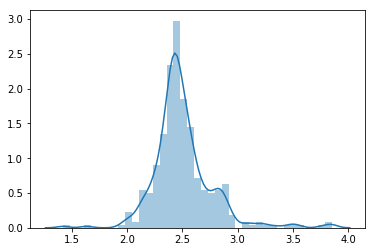

In [641]:
import seaborn as sns

sns.distplot(y_)

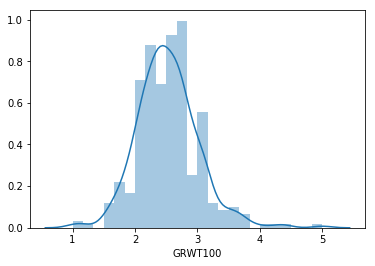

In [642]:
sns.distplot(test_res)

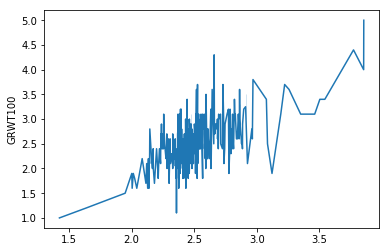

In [643]:
sns.lineplot(y_,test_res)

In [523]:
train_df

X28751_G_NA  X28751_G_0  X28751_G_1  X28751_G_2  X31071_A_NA  \
1387          0.0         1.0         0.0         0.0          0.0   
287           0.0         1.0         0.0         0.0          0.0   
389           0.0         1.0         0.0         0.0          0.0   
1362          0.0         1.0         0.0         0.0          0.0   
1756          0.0         1.0         0.0         0.0          0.0   
813           0.0         0.0         0.0         1.0          0.0   
1212          0.0         1.0         0.0         0.0          0.0   
511           0.0         1.0         0.0         0.0          0.0   
1652          0.0         1.0         0.0         0.0          0.0   
596           0.0         0.0         0.0         1.0          0.0   
292           0.0         1.0         0.0         0.0          0.0   
265           0.0         0.0         0.0         1.0          0.0   
173           0.0         1.0         0.0         0.0          0.0   
1149          0.0         0.0         0.0         1.0          0.0   
65            0.0         1.0         0.0         0.0          0.0   
1382          0.0         1.0         0.0         0.0          0.0   
1066          0.0         1.0         0.0         0.0          0.0   
1765          0.0         1.0         0.0         0.0          0.0   
268           1.0         0.0         0.0         0.0          0.0   
1114          0.0         1.0         0.0         0.0          0.0   
369           0.0         1.0         0.0         0.0          0.0   
243           0.0         1.0         0.0         0.0          0.0   
1086          0.0         1.0         0.0         0.0          0.0   
716           0.0         1.0         0.0         0.0          0.0   
1268          0.0         1.0         0.0         0.0          0.0   
1144          0.0         0.0         0.0         1.0          0.0   
470           0.0         0.0         0.0         1.0          0.0   
867           0.0         1.0         0.0         0.0          0.0   
1613          0.0         0.0         0.0         1.0          0.0   
920           1.0         0.0         0.0         0.0          0.0   
...           ...         ...         ...         ...          ...   
498           0.0         0.0         0.0         1.0          0.0   
1310          0.0         1.0         0.0         0.0          0.0   
1697          0.0         1.0         0.0         0.0          0.0   
1771          0.0         1.0         0.0         0.0          0.0   
74            0.0         1.0         0.0         0.0          0.0   
246           0.0         1.0         0.0         0.0          0.0   
258           0.0         1.0         0.0         0.0          0.0   
552           0.0         1.0         0.0         0.0          0.0   
1279          0.0         0.0         0.0         1.0          0.0   
1499          1.0         0.0         0.0         0.0          0.0   
1561          0.0         1.0         0.0         0.0          0.0   
732           0.0         1.0         0.0         0.0          0.0   
71            0.0         1.0         0.0         0.0          0.0   
505           0.0         1.0         0.0         0.0          0.0   
1154          0.0         0.0         0.0         1.0          0.0   
510           0.0         0.0         0.0         1.0          0.0   
1394          0.0         1.0         0.0         0.0          0.0   
1043          0.0         0.0         0.0         1.0          0.0   
606           0.0         1.0         0.0         0.0          0.0   
821           0.0         1.0         0.0         0.0          0.0   
125           0.0         0.0         0.0         1.0          0.0   
1069          0.0         1.0         0.0         0.0          0.0   
1032          0.0         0.0         0.0         1.0          0.0   
1667          0.0         1.0         0.0         0.0          0.0   
625           1.0         0.0         0.0         0.0          0.0   
410           0.

In [339]:
temp_list[45820:45841]

['X373136587_A_NAN',
 'X373136587_A_0',
 'X373136587_A_1',
 'X373136587_A_2',
 'X373147165_G_NAN',
 'X373147165_G_0',
 'X373147165_G_1',
 'X373147165_G_2',
 'X373168073_A_NAN',
 'X373168073_A_0',
 'X373168073_A_1',
 'X373168073_A_2',
 'X373199465_C_NAN',
 'X373199465_C_0',
 'X373199465_C_1',
 'X373199465_C_2',
 'X373240584_T_NAN',
 'X373240584_T_0',
 'X373240584_T_1',
 'X373240584_T_2',
 'Seedling_height']

In [342]:
final_df[temp_list]

X28751_G_NAN  X28751_G_0  X28751_G_1  X28751_G_2  X31071_A_NAN  \
0              0           0           0           0             0   
1              0           0           0           0             0   
2              0           0           0           0             0   
3              0           0           0           0             0   
4              0           0           0           0             0   
5              0           0           0           0             0   
6              0           0           0           0             0   
7              0           0           0           0             0   
8              0           0           0           0             0   
9              0           0           0           0             0   
10             0           0           0           0             0   
11             0           0           0           0             0   
12             0           0           0           0             0   
13             0           0           0           0             0   
14             0           0           0           0             0   
15             0           0           0           0             0   
16             0           0           0           0             0   
17             0           0           0           0             0   
18             0           0           0           0             0   
19             0           0           0           0             0   
20             0           0           0           0             0   
21             0           0           0           0             0   
22             0           0           0           0             0   
23             0           0           0           0             0   
24             0           0           0           0             0   
25             0           0           0           0             0   
26             0           0           0           0             0   
27             0           0           0           0             0   
28             0           0           0           0             0   
29             0           0           0           0             0   
..           ...         ...         ...         ...           ...   
70             0           0           0           0             0   
71             0           0           0           0             0   
72             0           0           0           0             0   
73             0           0           0           0             0   
74             0           0           0           0             0   
75             0           0           0           0             0   
76             0           0           0           0             0   
77             0           0           0           0             0   
78             0           0           0           0             0   
79             0           0           0           0             0   
80             0           0           0           0             0   
81             0           0           0           0             0   
82             0           0           0           0             0   
83             0           0           0           0             0   
84             0           0           0           0             0   
85             0           0           0           0             0   
86             0           0           0           0             0   
87             0           0           0           0             0   
88             0           0           0           0             0   
89             0           0           0           0             0   
90             0           0           0           0             0   
91             0           0           0           0             0   
92             0           0           0           0             0   
93             0           0           0           0             0   
94             0           0           0           0             0   
95            

# Model Building

ImportError: cannot import name RandomForestsRegressor

In [ ]:
model_RF = Random

In [310]:
len(new_train_col)

45840

In [313]:
len(final_df.columns.values)

45866

### Stratified Split

In [298]:
train_df, test_df = data_splitinator(final_df, response)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
# SANITY CHECKER
unique_group = data_df['group'].unique()
sum_ = 0
for group in unique_group:
    print('Group {}: {}'.format(group, sum(data_df.group == group)))
    sum_ = sum_ + sum(data_df.group == group)

print('TOTAL DATA POINTS: {}'.format(sum_))

Group ind1B: 66
Group indx: 354
Group ind2: 208
Group temp: 104
Group aus: 147
Group admix: 53
Group aro: 53
Group trop1: 223
Group trop2: 84
Group japx: 24
Group ind3: 363
Group ind1A: 105
TOTAL DATA POINTS: 1784


# Stroing DataFrames

In [73]:
test_df.to_pickle(os.path.join(os.getcwd(), 'dataset', 'test.pickle'))
train_df.to_pickle(os.path.join(os.getcwd(), 'dataset', 'train.pickle'))

# Modeling